<a href="https://colab.research.google.com/github/seoljincheol/Machine-Learning/blob/main/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(7%EC%9E%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장. 딥러닝을 시작합니다

### 7-1. 인공신경망

In [ ]:
# fashion mnist
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


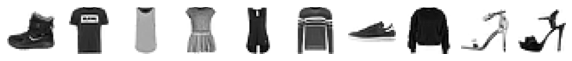

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))
# target: 0~9, counts: 6,000 each 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 60,000 * 28 * 28 => 1차원 데이터로 변환
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import  SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42) # max_iter: 반복횟수
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


텐서플로와 케라스

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 이진분류 : loss='binary crossentropy'
# 다중분류 : loss='catogorical_crossentropy'
# 정수class: loss='sparse_categorical_crossentropy'
# 회귀모델 : loss='mean_square_error'
# one-hot-encoding

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7766 - accuracy: 0.7379
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4895 - accuracy: 0.8351
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4604 - accuracy: 0.8457
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4453 - accuracy: 0.8506
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4412 - accuracy: 0.8549


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 911us/step - loss: 0.4480 - accuracy: 0.8543


[0.4480336904525757, 0.8542500138282776]

* 사이킷런
>* (모델) sc = SGDClassifier(loss='log', max_iter=5)
>* (훈련) sc.fit(train_scaled, train_target)
>* (평가) sc.score(val_scaled, val_target)
* 케라스
> *         dense = keras.layers.Dense(10, activation='softmax', input_shape(784,))
>* (모델) model = keras.Sequential(dense)
>*        model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
>* (훈련) model.fit(train_scaled, train_target, epochs=5)
>* (평가) model.evaluate(val_scaled, val_target)

### 7-2. 심층 신경망

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


층을 추가하는 다른 방법

In [ ]:
#1. 한 줄에 코딩
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', 
                                             input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax', name='output')],
                         name = 'fashion MNIST model')
model.summary()

In [ ]:
#2. add 사용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7638 - accuracy: 0.7521
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4149 - accuracy: 0.8504
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3674 - accuracy: 0.8675
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3502 - accuracy: 0.8748
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8785


렐루 함수: 이미지 분류모델의 hidden layer에 많이 사용하는 활성화 함수

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 데이터 준비
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
# train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 모델 컴파일, 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6771 - accuracy: 0.7646
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3965 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3579 - accuracy: 0.8707
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3317 - accuracy: 0.8797
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3199 - accuracy: 0.8861


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3579 - accuracy: 0.8768


[0.35789230465888977, 0.8768333196640015]

옵티마이저:  신경망의 가중치와 절편을 학습하기 위한 알고리즘
>* SGD: 기본 경사 하강법, nesterov, momentum
>* Adagrad: 그래디언트 제곱을 누적하여 학습률을 나눔
>* RMSprop: + 지수감소 사용
>* Adam: 모멘텀최적화의 그래디언트 지수감소평균 조절_ beta_1 (default: 0.9), RMSprop의 그래디언트 제곱의 지수감소평균 조절_ beta2 (default: 0.999)
* (etc) 하이퍼파라미터: 은닉층 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈, 에포크

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
# sgd = keras.optimizer.SGD()
# model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# 모멘텀 최적화
sgd = keras.optimizers.SGD(learning_rate = 0.1)
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True) 
# momentum: default=0, 대개 0.9 이상을 지정
# nesterov: 모멘텀 최적화 2회 반복

In [ ]:
# 적응적 학습률: Adagrad, RMSprop
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# Adam : 모멘텀 최적화 + RMSprop (learning_rate=0.001)
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6764 - accuracy: 0.7655
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4007 - accuracy: 0.8584
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8728
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3271 - accuracy: 0.8816
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.8908


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3516 - accuracy: 0.8720


[0.3515954911708832, 0.871999979019165]

### 7-3. 신경망 모델 훈련

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)  
# verbose=1: 진행상황 및 지표 출력, 2: 지표 출력, 0: 출력X 
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


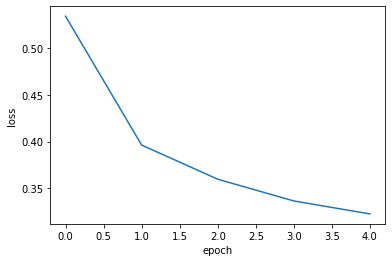

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

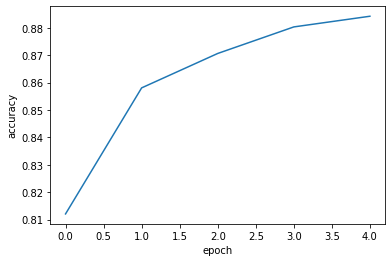

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

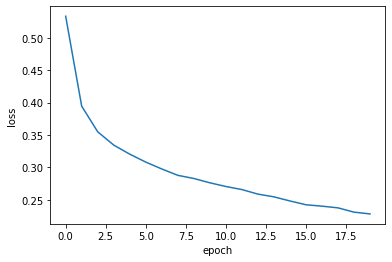

In [ ]:
# epochs = 20
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

검증 손실: validation_data 활용

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


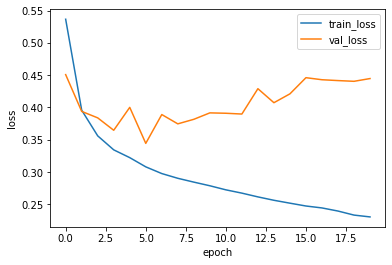

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

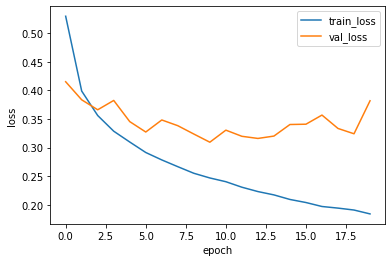

In [ ]:
# Adam optimizer
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

드롭 아웃

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


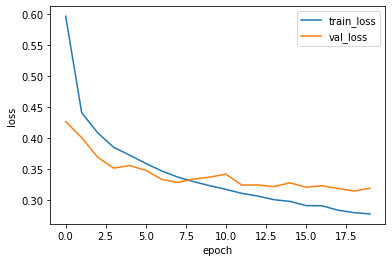

In [ ]:
# model에 dropout=0.3 적용됨
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

모델 저장과 복원

In [ ]:
# epochs = 10
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5') # 훈련된 모델의 파라미터 저장
model.save('model-whole.h5')           # 모델 구조와 파라미터 함께 저장

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 981776 Jan 23 12:05 best-model.h5
-rw-r--r-- 1 root root 332480 Jan 23 13:09 model-weights.h5
-rw-r--r-- 1 root root 981776 Jan 23 13:09 model-whole.h5


In [ ]:
#1. 훈련을 하지 않은 새로운 모델을 만들고, 저장했던 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
# np.argmax: predict 값 중에 가장 큰 값의 인덱스 반환
# axis=-1: argmax()함수 배열의 마지막 차원, 2차원 배열-> 1차원 배열 

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) 
print(np.mean(val_labels == val_target))

0.8815


In [ ]:
#2. 모델 전체를 파이리에서 읽고, 검증세트 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3296 - accuracy: 0.8815


[0.3296326994895935, 0.8815000057220459]

콜백: 
* ModelCheckpoint: 최상의 검증 점수를 만드는 모델을 저장
> monitor: 모니터링 지표(default: val_loss) // 
> save_weights_only: 가중치와 절편 저장(default: True)
* EarlyStopping: 과대 적합이 시작되기 전에 조기 종료
> patience: 모델이 더 이상 향상되지 않고 지속될 수 있는 최대 에포크 수 //
> restore_best_weights: 최상의 모델가중치 복원 여부(default: False)


In [ ]:
# ModelCheckpoint
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3323 - accuracy: 0.8801


[0.3323375880718231, 0.8800833225250244]

In [ ]:
# EarlyStopping
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,     # 2번 연속 검증점수가 향상되지 않으면 훈련중지
                                                  restore_best_weights=True)  # 가장 낮은 검증손실을 낸 모델
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# 몇 번째 에포크에서 훈련이 중지 되었는가
# patience=2 ==>> 5-1=4번째 에포크에서 가장 낮은 손실
print(early_stopping_cb.stopped_epoch)

5


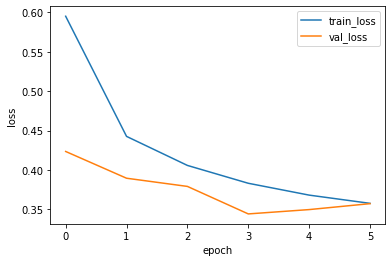

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8753


[0.3441556692123413, 0.875333309173584]